<a href="https://colab.research.google.com/github/steffiangel/AML/blob/main/lab3_a(logistic_term%20deposit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.api import OLS


In [14]:
df= pd.read_csv('/content/Program_3a_Dataset - Program_3a_Dataset.csv')


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [17]:
for col in df.columns:
    if col not in ['age', 'day_of_week']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,mon,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,mon,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,mon,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,mon,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,mon,...,0,26,0,1,8,18,16,287,8,0


<ipython-input-24-2bce69c0f2bb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


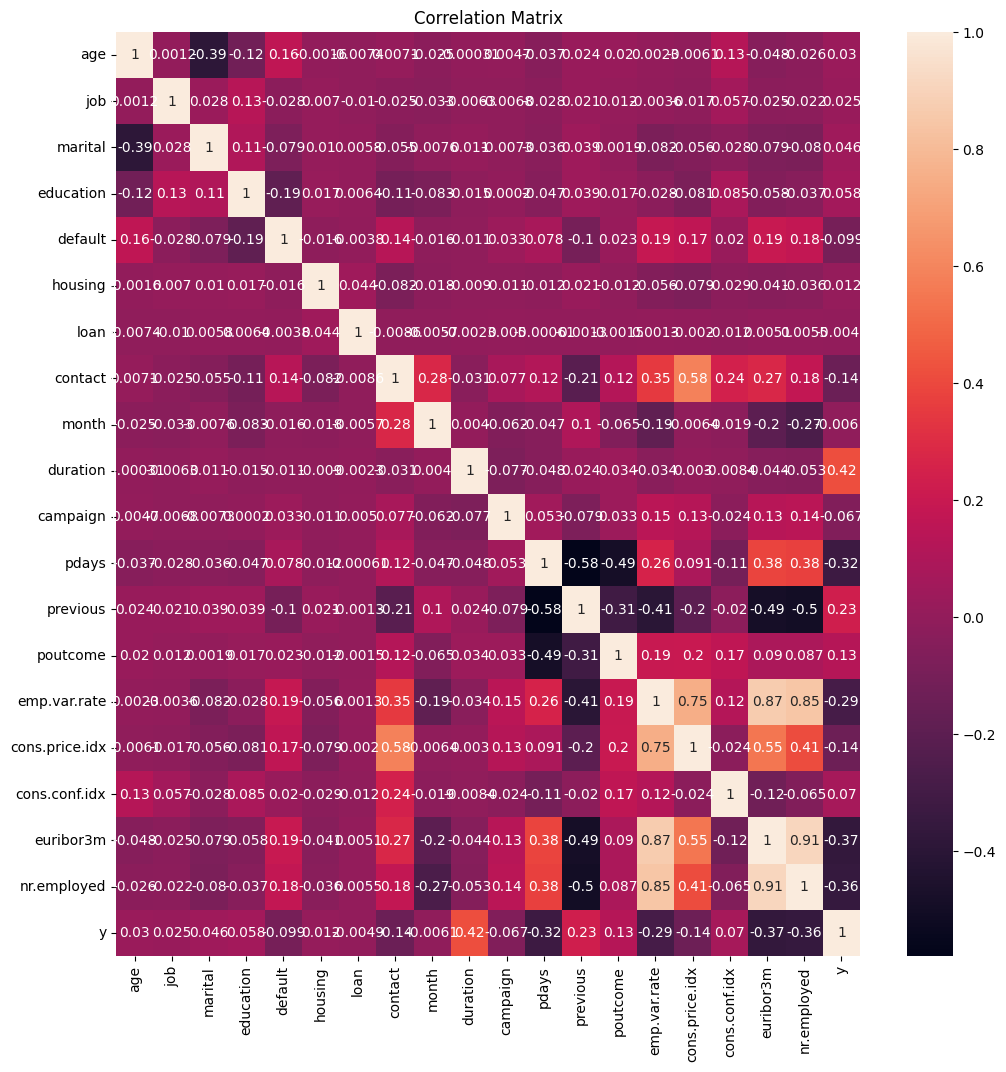

In [24]:
import seaborn as sns
plt.figure(figsize=(12, 12))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()

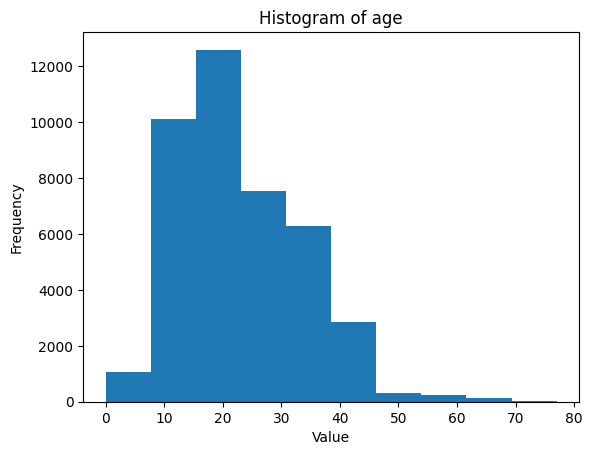

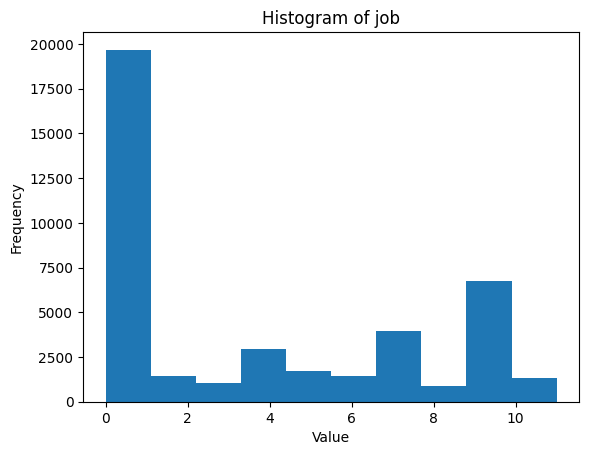

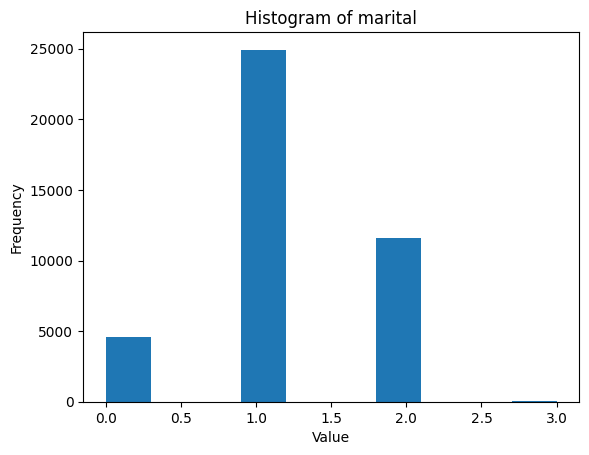

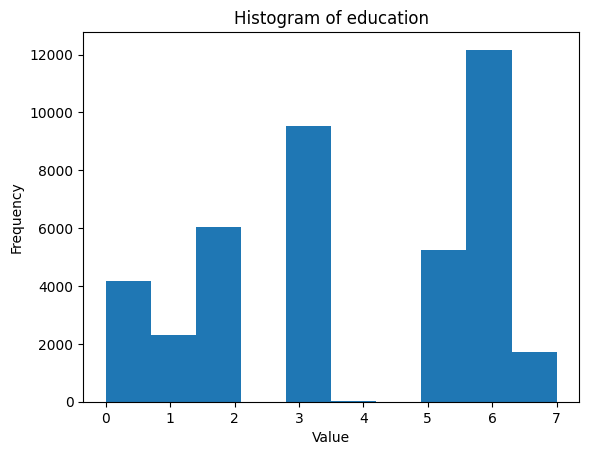

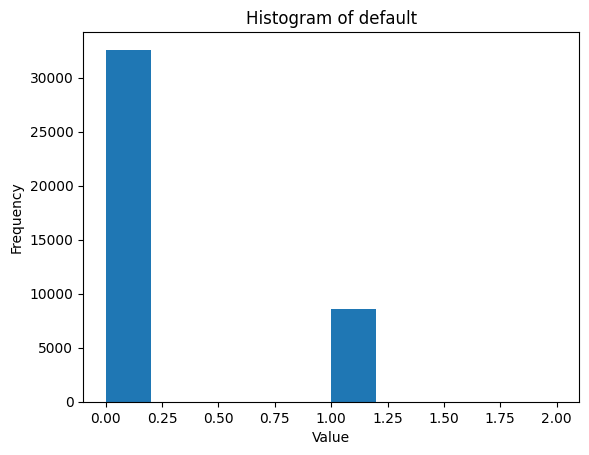

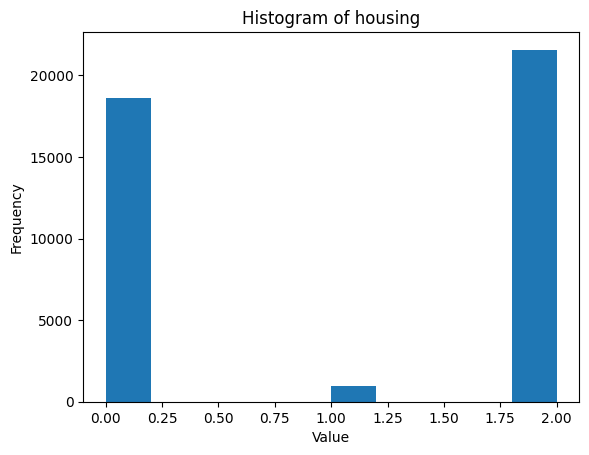

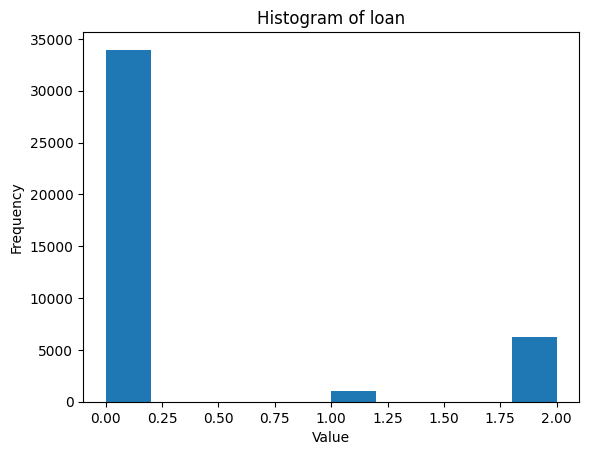

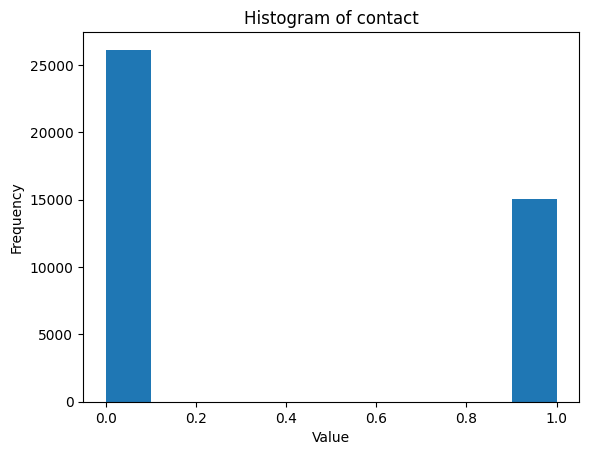

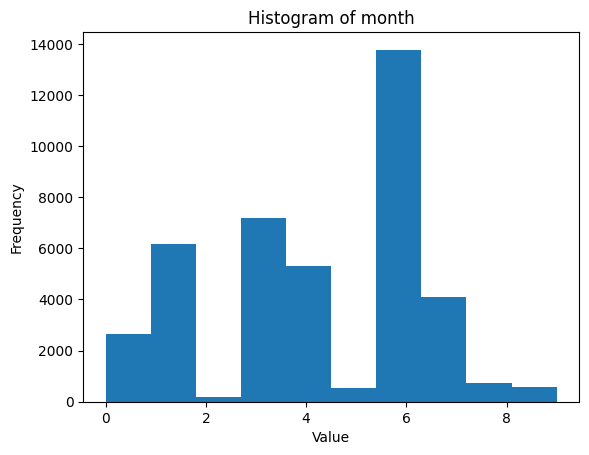

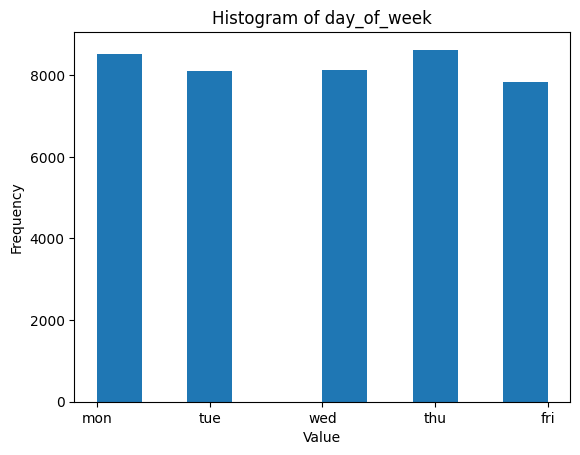

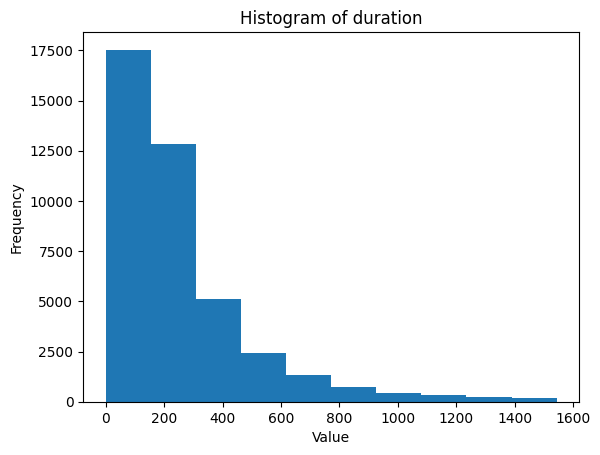

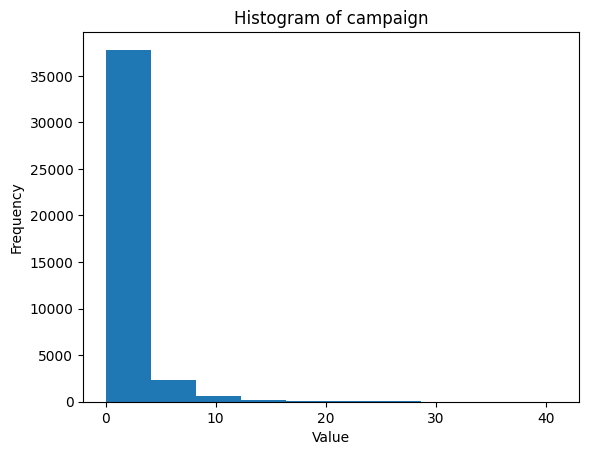

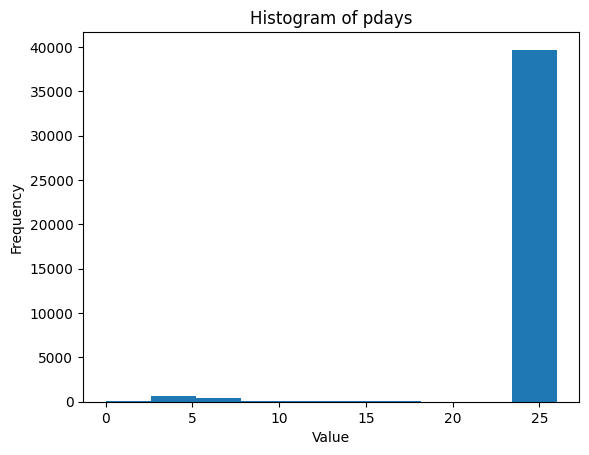

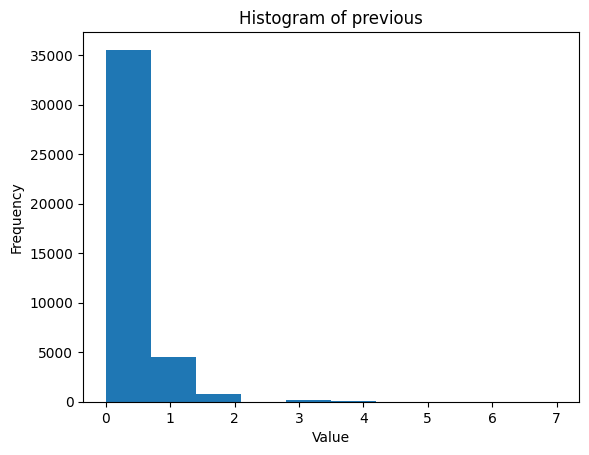

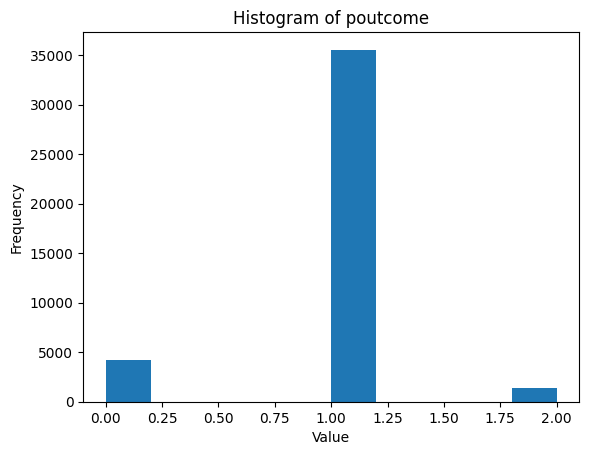

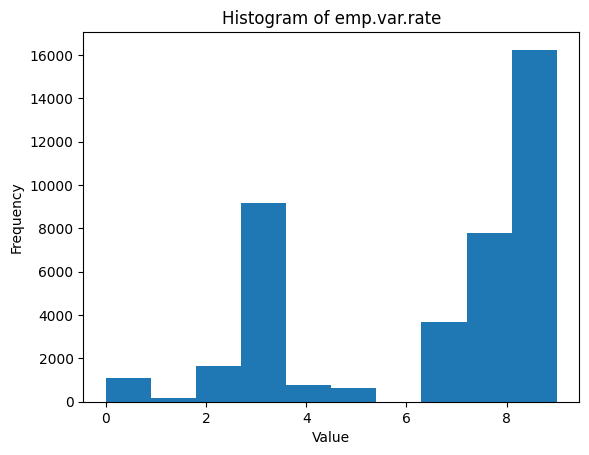

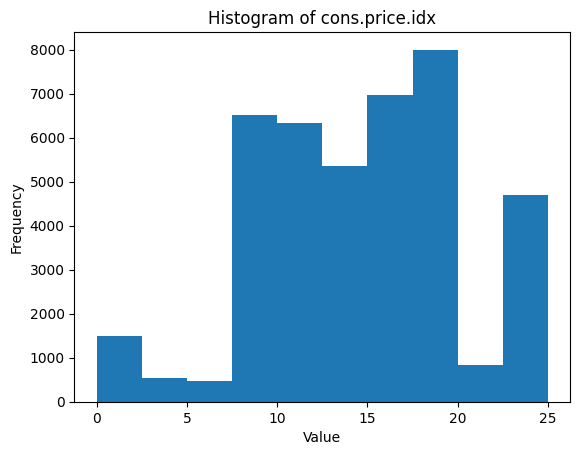

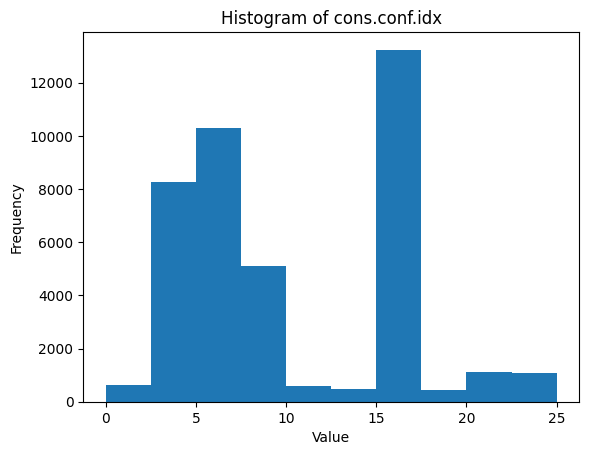

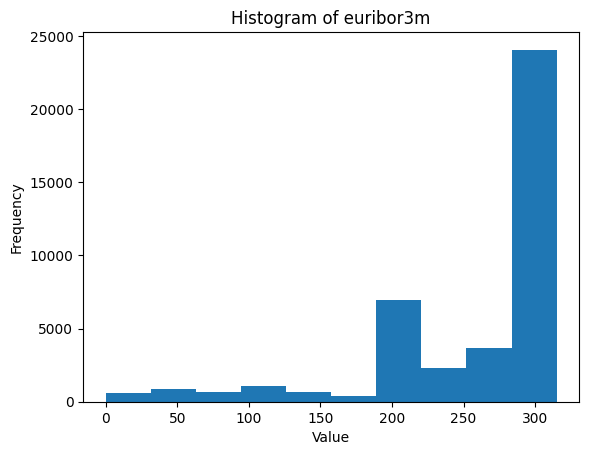

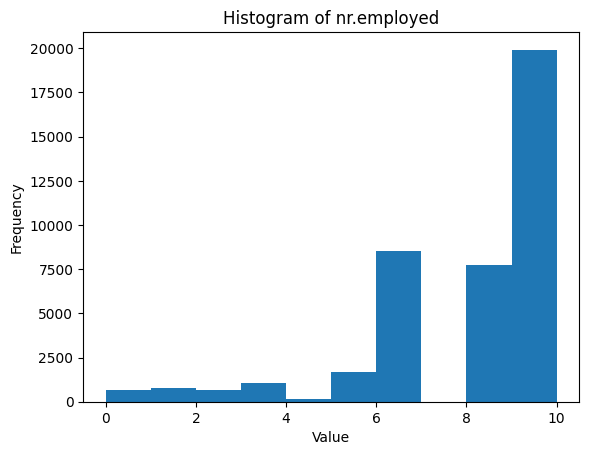

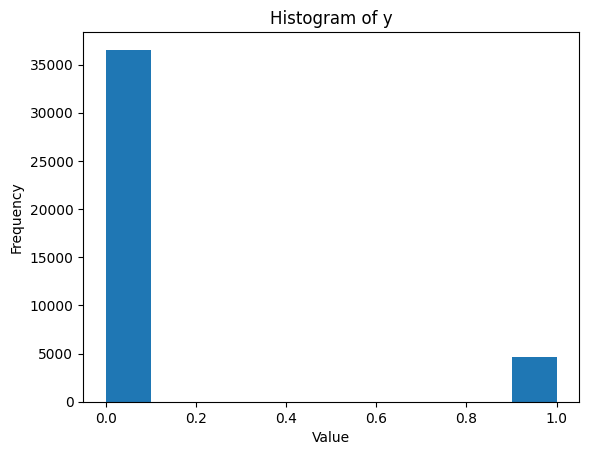

In [22]:
for col in df.columns:
    plt.hist(df[col], bins=10)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

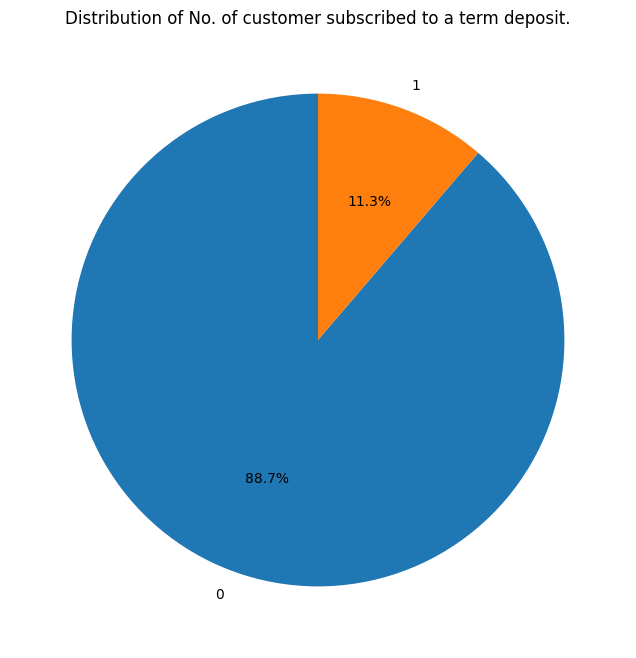

In [23]:
attrition_counts = df['y'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of No. of customer has  a term deposit.')
plt.show()

In [25]:

from sklearn.model_selection import train_test_split

X = df[['duration', 'age', 'campaign']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [29]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred

array([1, 0, 0, ..., 0, 0, 0])

In [30]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

y_train pred is the predictions made on the training data from which we bulid the model.Y_test pred is the prediactions made on the test data which we use to teast the accuracy of our model. we then find the no. of common predication between train_pred and  test_pred and calculate the accuracy

In [31]:
train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.8926155873885748
Test Accuracy: 0.8959294327102048


In [36]:

conf_matrix = np.zeros((2, 2), dtype=int)
for true_label, predicted_label in zip(y_test, y_test_pred):
    conf_matrix[true_label, predicted_label] += 1


print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[10783   186]
 [ 1100   288]]


We initailly make a 2x2 matrix where mat[0,0] test_label is 0 and predicted_label is also 0, then conf_matrix[0, 0] is incremented by 1, indicating a true negative. If test_label is 1 and predicted_label is 0, then conf_matrix[1, 0] is incremented by 1, indicating a false negative.

In [38]:

true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]
print("TP = ",true_positives)
print("FP = ",false_positives)
print("TN = ",true_negatives)
print("FN = ",false_negatives)

TP =  288
FP =  186
TN =  10783
FN =  1100


True Positive (TP): The model correctly predicted 288 instances as positive.

False Positive (FP): The model incorrectly predicted 186 instances as positive when they were actually negative.

True Negative (TN): The model correctly predicted 10783 instances as negative.

False Negative (FN): The model incorrectly predicted 1100 instances as negative when they were actually positive.

In [39]:

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Precision: 0.6075949367088608
Recall: 0.207492795389049
Accuracy: 0.8959294327102048



precision = true_positives / (true_positives + false_positives)

recall = true_positives / (true_positives + false_negatives)

accuracy = (true_positives + true_negatives) / total (true positives,true negatives,false positives and false negatives)

Precision (Positive Predictive Value): 60.76%-----indicates that out of all instances predicted as positive, around 60.76% were actually positive.
Recall (Sensitivity or True Positive Rate): 20.75%------indicates that out of all actual positive instances, the model captured around 20.75%.
Accuracy: 89.59%----the overall correct classification rate. The model correctly predicted the class of the instances around 89.59% of the time.




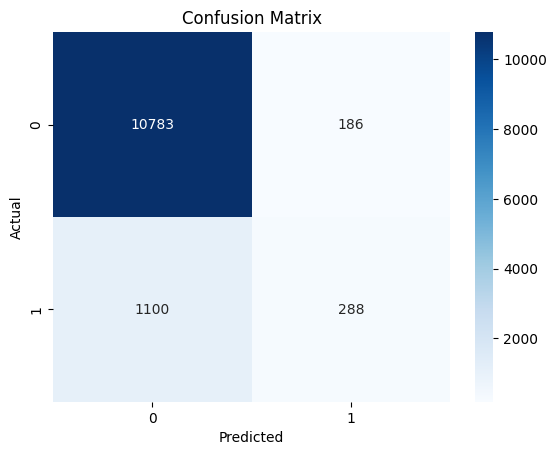

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()